## Observations and Insights

Overall, based on the data from the tests on these mice, Capomulin seems to have a comparable effectiveness to Ramicane and could be advanced by Pymaceuticals as an alternative treatment to Ramicane for SCC.

For the equal amount of mice having undergone each treatment, Capomulin and Ramicane have a similar level of success on the mice completing the trials over the 45 day period, based on the similarly high number of data points compared to the other drugs.

Throughout the study, both Capomulin and Ramicane have had similarly low values across all measures of central tendencies (mean, median, variance, standard deviation, and standard error), far below all the other drugs.  In terms of mean and median, this means both treatments resulted in lower tumor sizes (and indeed were the only drugs where these values were below the starting value of 45 cubic cm).  In terms of variance, standard deviation, and standard error, this shows the consistency in effectiveness over the treated population.

These conclusions are echoed in the analysis of the final tumor volumes for Capomulin and Ramicane vs. Ceftamin and Infubinol.  Capomulin and Ramicane have similarly low IQR and Quartile values, showing again their consistency and their overall effectiveness in reducing the Tumor Volume.

The mice treated with Capomulin have tumor sizes that are reliably, positively correlated with their weights.

### Setup & Data Import

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results)
print(f"There are {mouse_study.shape[0]} rows of data.")

There are 1893 rows of data.


### Duplicates Cleanup

In [4]:
# Checking the number of mice.
print(f'There are data for {len(mouse_metadata["Mouse ID"].unique())} mice.')

There are data for 249 mice.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_search = mouse_study.groupby(["Mouse ID","Timepoint"]).count()
duplicate_find = duplicate_search.loc[duplicate_search["Drug Regimen"] > 1]

## Create an empty list in which to populate any mice with duplicate information
duplicate_mice = []

## Iterate through the duplicates if there are any to get the unique list
if len(duplicate_find) > 0:
    for mouse in duplicate_find.index:
        if mouse[0] not in duplicate_mice:
            duplicate_mice.append(mouse[0])
            
## Print the quantity and identity of duplicate mice
    print(f'Number of duplicate mice: {len(duplicate_mice)}')
    for mouse in duplicate_mice:
        print(f'Information for duplicate mouse {mouse} will be scrubbed from the data.')
else: print("There are no duplicate mice.")

Number of duplicate mice: 1
Information for duplicate mouse g989 will be scrubbed from the data.


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_info = pd.DataFrame()
if len(duplicate_mice) > 0:
    for x in range(0,len(duplicate_mice)):
        duplicate_info = duplicate_info.append(mouse_study.loc[mouse_study["Mouse ID"] == duplicate_mice[x]])
## Confirm number of rows
print(f"There are {duplicate_info.shape[0]} rows of data concerning the duplicate mice.")

There are 13 rows of data concerning the duplicate mice.


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
if len(duplicate_mice) > 0:
## For each mouse in the duplicate list, drop it from the dataframe
    for mouse in duplicate_mice:
        mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != mouse]
## Confirm new number of rows
print(f"There are {mouse_study.shape[0]} rows of data for non-duplicate mice.")

There are 1880 rows of data for non-duplicate mice.


In [8]:
# Checking the number of mice in the clean DataFrame.
quantity = len(mouse_study["Mouse ID"].unique())
print(f"There are {quantity} non-duplicate mice in the study.")

There are 248 non-duplicate mice in the study.


## Summary Statistics

In [9]:
# Generate a summary statistics table of
    # mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward,
    # creating multiple series and putting them all together at the end.
## For each Regimen,
regimen_summary = mouse_study.groupby("Drug Regimen")
    ## Provide the Summary Information for Tumor Volume
regimen_stats = pd.DataFrame({"Mean":regimen_summary["Tumor Volume (mm3)"].mean(),
                                  "Median":regimen_summary["Tumor Volume (mm3)"].median(),
                                  "Variance":regimen_summary["Tumor Volume (mm3)"].var(),
                                  "Standard Deviation":regimen_summary["Tumor Volume (mm3)"].std(),
                                  "Standard Error":regimen_summary["Tumor Volume (mm3)"].sem(),})
regimen_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of
    # mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimen_summary = mouse_study.groupby("Drug Regimen").agg \
                ({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

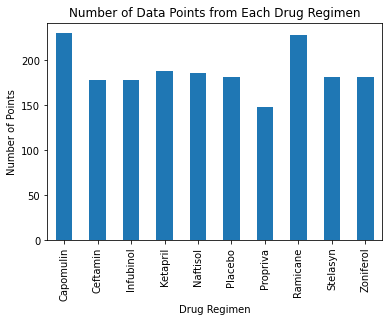

In [11]:
# Generate a bar plot showing the total number of mice for each treatment
    # throughout the course of the study using pandas.
## For each Regimen,
regimen_data_gb = mouse_study.groupby("Drug Regimen").count()
    ## Provide the count of Timepoints
regimen_data = pd.DataFrame({"Number of Datapoints":regimen_data_gb["Timepoint"]})

regimen_data.plot(kind="bar", legend=None, title="Number of Data Points from Each Drug Regimen")\
    .set_ylabel("Number of Points")
plt.show()

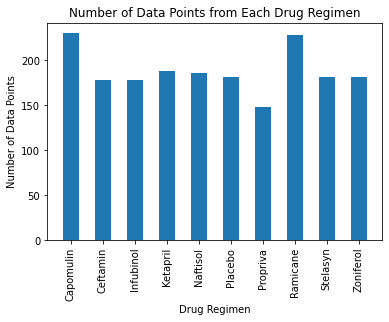

In [12]:
# Generate a bar plot showing the total number of mice for each treatment
    # throughout the course of the study using pyplot.
plt.bar(regimen_stats.index, regimen_data["Number of Datapoints"], align="center", width=0.5)
plt.xticks(rotation="vertical")
plt.title("Number of Data Points from Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

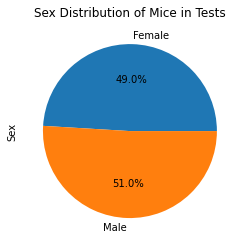

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
## For each sex,
sex_dist_gb = mouse_study.groupby("Sex").count()
    ## Provide the count of mice
sex_dist = pd.DataFrame({"Number of Mice":sex_dist_gb["Mouse ID"]})
sex_dist.plot(kind="pie",y="Number of Mice", legend=None, title="Sex Distribution of Mice in Tests",\
              autopct="%1.1f%%").set_ylabel("Sex")
plt.show()

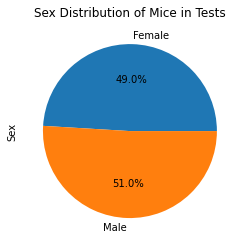

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist["Number of Mice"],labels=sex_dist.index.values,autopct="%1.1f%%")
plt.title("Sex Distribution of Mice in Tests")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime_mice_gb = mouse_study.groupby("Mouse ID").max()
maxtime_mice = pd.DataFrame({"Drug Regimen":maxtime_mice_gb["Drug Regimen"],
                             "Timepoint":maxtime_mice_gb["Timepoint"]})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtime_data = pd.merge(maxtime_mice,
                        mouse_study[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]],
                        on=["Timepoint","Drug Regimen","Mouse ID"], how="left")

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
## Create set of volumes for individual drug analysis
volumes = []
## Append each set of volumes to a list for plotting all drugs
volumes_list = []
## List of quartiles and IQRs for each drug
lowerq = []
upperq = []
iqr = []
## max and min volumes to compare to upper & Lower threshold for outliers
min_vol = []
max_vol = []
lowers = []
uppers = []
## count the number of outliers for each drug
outlier_qty = []
## save outlier values
outlier_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for x in range(0,len(treatments)):
## For each treatment specified,
    volumes = maxtime_data.loc[maxtime_data["Drug Regimen"] == treatments[x],"Tumor Volume (mm3)"]
    ## Place final volume from each mouse treated in a single list
    volumes_list.append(volumes)
    ## Find the minimum and maximum values of the list and append to the master list
    min_vol.append(volumes.min())
    max_vol.append(volumes.max())
    ## Find the quartiles and append them to the master lists
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq.append(quartiles[.25])
    upperq.append(quartiles[.75])
    ## Find the IQR and bounds for outliers and append to the master lists
    calc_iqr = quartiles[.75]-quartiles[.25]
    iqr.append(calc_iqr)
    lower_bound = (quartiles[.25])-(calc_iqr*1.5)
    lowers.append(lower_bound)
    upper_bound = (quartiles[.75])+(calc_iqr*1.5)
    uppers.append(upper_bound)
    ## Reset the outlier count and outlier values counts
    outliers = 0
    outlier_values = []
    ## Find outliers by comparing to upper and lower bounds
    for volume in volumes:
        if volume > upper_bound or volume < lower_bound :
    ## Add to the list of values and increase the count
            outlier_values.append(round(volume,7))
            outliers += 1
    ## Put the list in the master list
    if len(outlier_values) > 0:
        outlier_list.append(outlier_values)
    ## If none found, state None.
    else:
        outlier_list.append("None")
    ## Put the quantity of outliers in the list.
    outlier_qty.append(outliers)

## Basic information
treatments_quartiles = pd.DataFrame({"Drug Regimen":treatments,"Lower Quartile":lowerq,
                                     "Upper Quartile":upperq,"IQR":iqr,
                                     "Number of Outliers":outlier_qty,"Outliers":outlier_list})
treatments_quartiles

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Number of Outliers,Outliers
0,Capomulin,32.377357,40.159220,7.781863,0,None
1,Ramicane,31.560470,40.659006,9.098537,0,None
2,Infubinol,54.048608,65.525743,11.477135,1,[36.3213458]
3,Ceftamin,48.722078,64.299830,15.577752,0,None


In [17]:
## Visually spotcheck the minimum value, lower/upper thresholds for outliers, and the maximum value.
treatments_outliers = pd.DataFrame({"Drug Regimen":treatments,
                                # Compare maximum/minimum and the IQR*1.5
                                "Outliers fall below":lowers,"Minimum Volume from Tests":min_vol,
                                "Maximum Volume from Tests":max_vol,"Outliers fall above":uppers,
                                # Show the count of such
                                "Number of Outliers":outlier_qty})
treatments_outliers

,Drug Regimen,Outliers fall below,Minimum Volume from Tests,Maximum Volume from Tests,Outliers fall above,Number of Outliers
0,Capomulin,20.704562,23.343598,47.685963,51.832015,0
1,Ramicane,17.912664,22.050126,45.220869,54.306811,0
2,Infubinol,36.832905,36.321346,72.226731,82.741446,1
3,Ceftamin,25.355450,45.000000,68.923185,87.666458,0


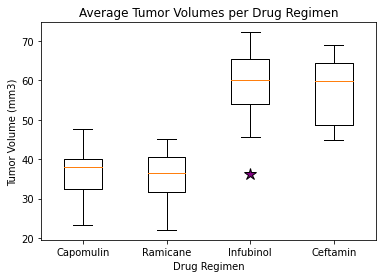

In [18]:
## Create distinct marker style for outliers
purplestar = dict(markerfacecolor='purple',marker='*',ms=12)
## Use the list of lists for boxplot comparison
plt.boxplot(volumes_list, flierprops=purplestar)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=range(1,len(treatments)+1),labels=treatments)
plt.title("Average Tumor Volumes per Drug Regimen")
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
choose_drug = "Capomulin"

## Isolate the information for the chosen drug
drug_data = mouse_study.loc[mouse_study["Drug Regimen"] == choose_drug]
## Narrow down all the mice
drug_mice = drug_data["Mouse ID"].unique()

## Choose one mouse from the list
import random
m = (random.randint(0, len(drug_mice)-1))
## Bring in the information for that mouse only
drug_mouse = mouse_study.loc[mouse_study["Mouse ID"] == drug_mice[m]]

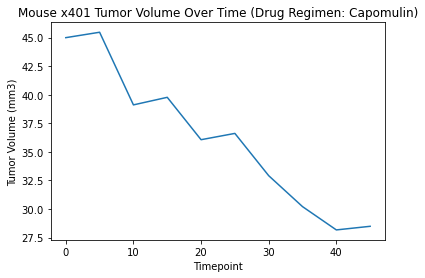

In [20]:
## Create the plot of volume y over time x
plt.plot(drug_mouse["Timepoint"],drug_mouse["Tumor Volume (mm3)"])
plt.title(f"Mouse {drug_mice[m]} Tumor Volume Over Time (Drug Regimen: {choose_drug})")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

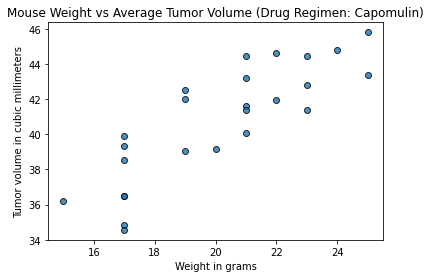

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## Retrieve the information for the chosen drug and group by mouse
drug_avg = drug_data.groupby("Mouse ID").mean()

## Create plot of tumor volume y over weight x
plt.scatter(drug_avg["Weight (g)"],drug_avg["Tumor Volume (mm3)"],alpha=0.8,edgecolors="black")
plt.xlabel("Weight in grams")
plt.ylabel("Tumor volume in cubic millimeters")
plt.title(f"Mouse Weight vs Average Tumor Volume (Drug Regimen: {choose_drug})")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(drug_avg["Weight (g)"],drug_avg["Tumor Volume (mm3)"])

## Print the result
print(f'The correlation between weight and average tumor volume for the \
{choose_drug} regimen is {round(correlation[0],2)}.')

The correlation between weight and average tumor volume for the Capomulin regimen is 0.84.


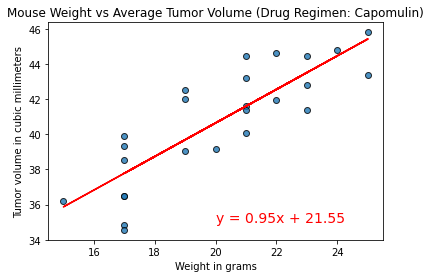

In [23]:
## Import linregress to create and plot line of regression
from scipy.stats import linregress

## Define the values for the regression calculation
x_values = drug_avg["Weight (g)"]
y_values = drug_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## Calculate the formula of the line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## Create plot of tumor volume y over weight x
plt.scatter(x_values,y_values,alpha=0.8,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight in grams")
plt.ylabel("Tumor volume in cubic millimeters")
plt.title(f"Mouse Weight vs Average Tumor Volume (Drug Regimen: {choose_drug})")

## Place the line equation in the regression map
plt.annotate(line_eq,(20,35),fontsize=14,color="red")
plt.show()